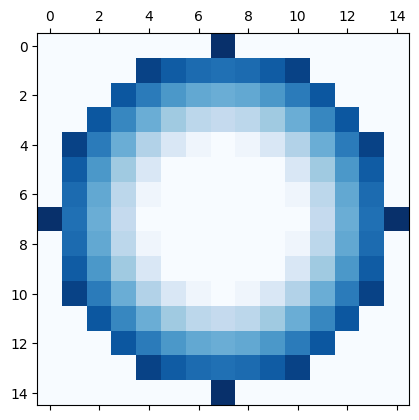

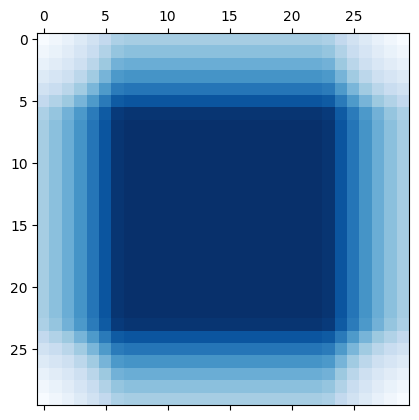

In [91]:
import numpy as np
import matplotlib.pyplot as plt

def create_kernel(outer_radius, inner_radius, smoothness):
    size = 2 * outer_radius + 1
    kernel = np.zeros((size, size))
    center = outer_radius

    for i in range(size):
        for j in range(size):
            distance = np.sqrt((i - center) ** 2 + (j - center) ** 2)
            if distance <= inner_radius:
                kernel[i, j] = 0  # Inside the inner circle, values are 0
            elif distance <= outer_radius:
                # Create a smooth transition from 0 to 1 using a smoothness factor
                kernel[i, j] = (distance - inner_radius) / (outer_radius - inner_radius) ** smoothness

    return kernel

def convolve_matrix(input_matrix, kernel):
    m, n = input_matrix.shape
    k = kernel.shape[0]
    pad = k // 2  # Padding size to handle boundary conditions
    output_matrix = np.zeros((m, n))

    for i in range(m):
        for j in range(n):
            for u in range(k):
                for v in range(k):
                    if i - pad + u >= 0 and i - pad + u < m and j - pad + v >= 0 and j - pad + v < n:
                        output_matrix[i, j] += input_matrix[i - pad + u, j - pad + v] + kernel[u, v] # tu *

    return output_matrix

# Define the matrix size and radius
m = 30
R = 7
R_inner = 3
smoothness = 90

# Create the Gaussian kernel
kernel = create_kernel(outer_radius=R, inner_radius=R_inner, smoothness=smoothness)
plt.matshow(kernel, cmap='Blues')
plt.show()

# Create the input matrix (e.g., random values for demonstration)
input_matrix = np.zeros((m, m))

# Perform convolution
output_matrix = convolve_matrix(input_matrix, kernel)
plt.matshow(output_matrix, cmap='Blues')
plt.show()
